In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iot-agriculture-2024/IoTProcessed_Data.csv


In [3]:
# load the dataset
data = pd.read_csv('/kaggle/input/iot-agriculture-2024/IoTProcessed_Data.csv')

# look at first 5 rows
# print(data.head())

# gives statisical summary
print(data.describe())

# checks for # missing values
print(data.isnull().sum())


        tempreature      humidity   water_level             N             P  \
count  37922.000000  37922.000000  37922.000000  37922.000000  37922.000000   
mean      18.760113     50.329308     79.401587    231.963610    234.123332   
std        7.143422     22.995645     36.824610     34.718121     31.452138   
min        3.000000      0.000000      0.000000      0.000000      0.000000   
25%       13.000000     49.000000     79.000000    185.000000    190.000000   
50%       17.000000     59.000000    100.000000    255.000000    255.000000   
75%       25.000000     62.000000    100.000000    255.000000    255.000000   
max       41.000000    100.000000    100.000000    255.000000    255.000000   

                  K  Fan_actuator_OFF  Fan_actuator_ON  \
count  37922.000000      37922.000000     37922.000000   
mean     225.171879          0.689863         0.310137   
std       44.877635          0.462555         0.462555   
min        0.000000          0.000000         0.000000  

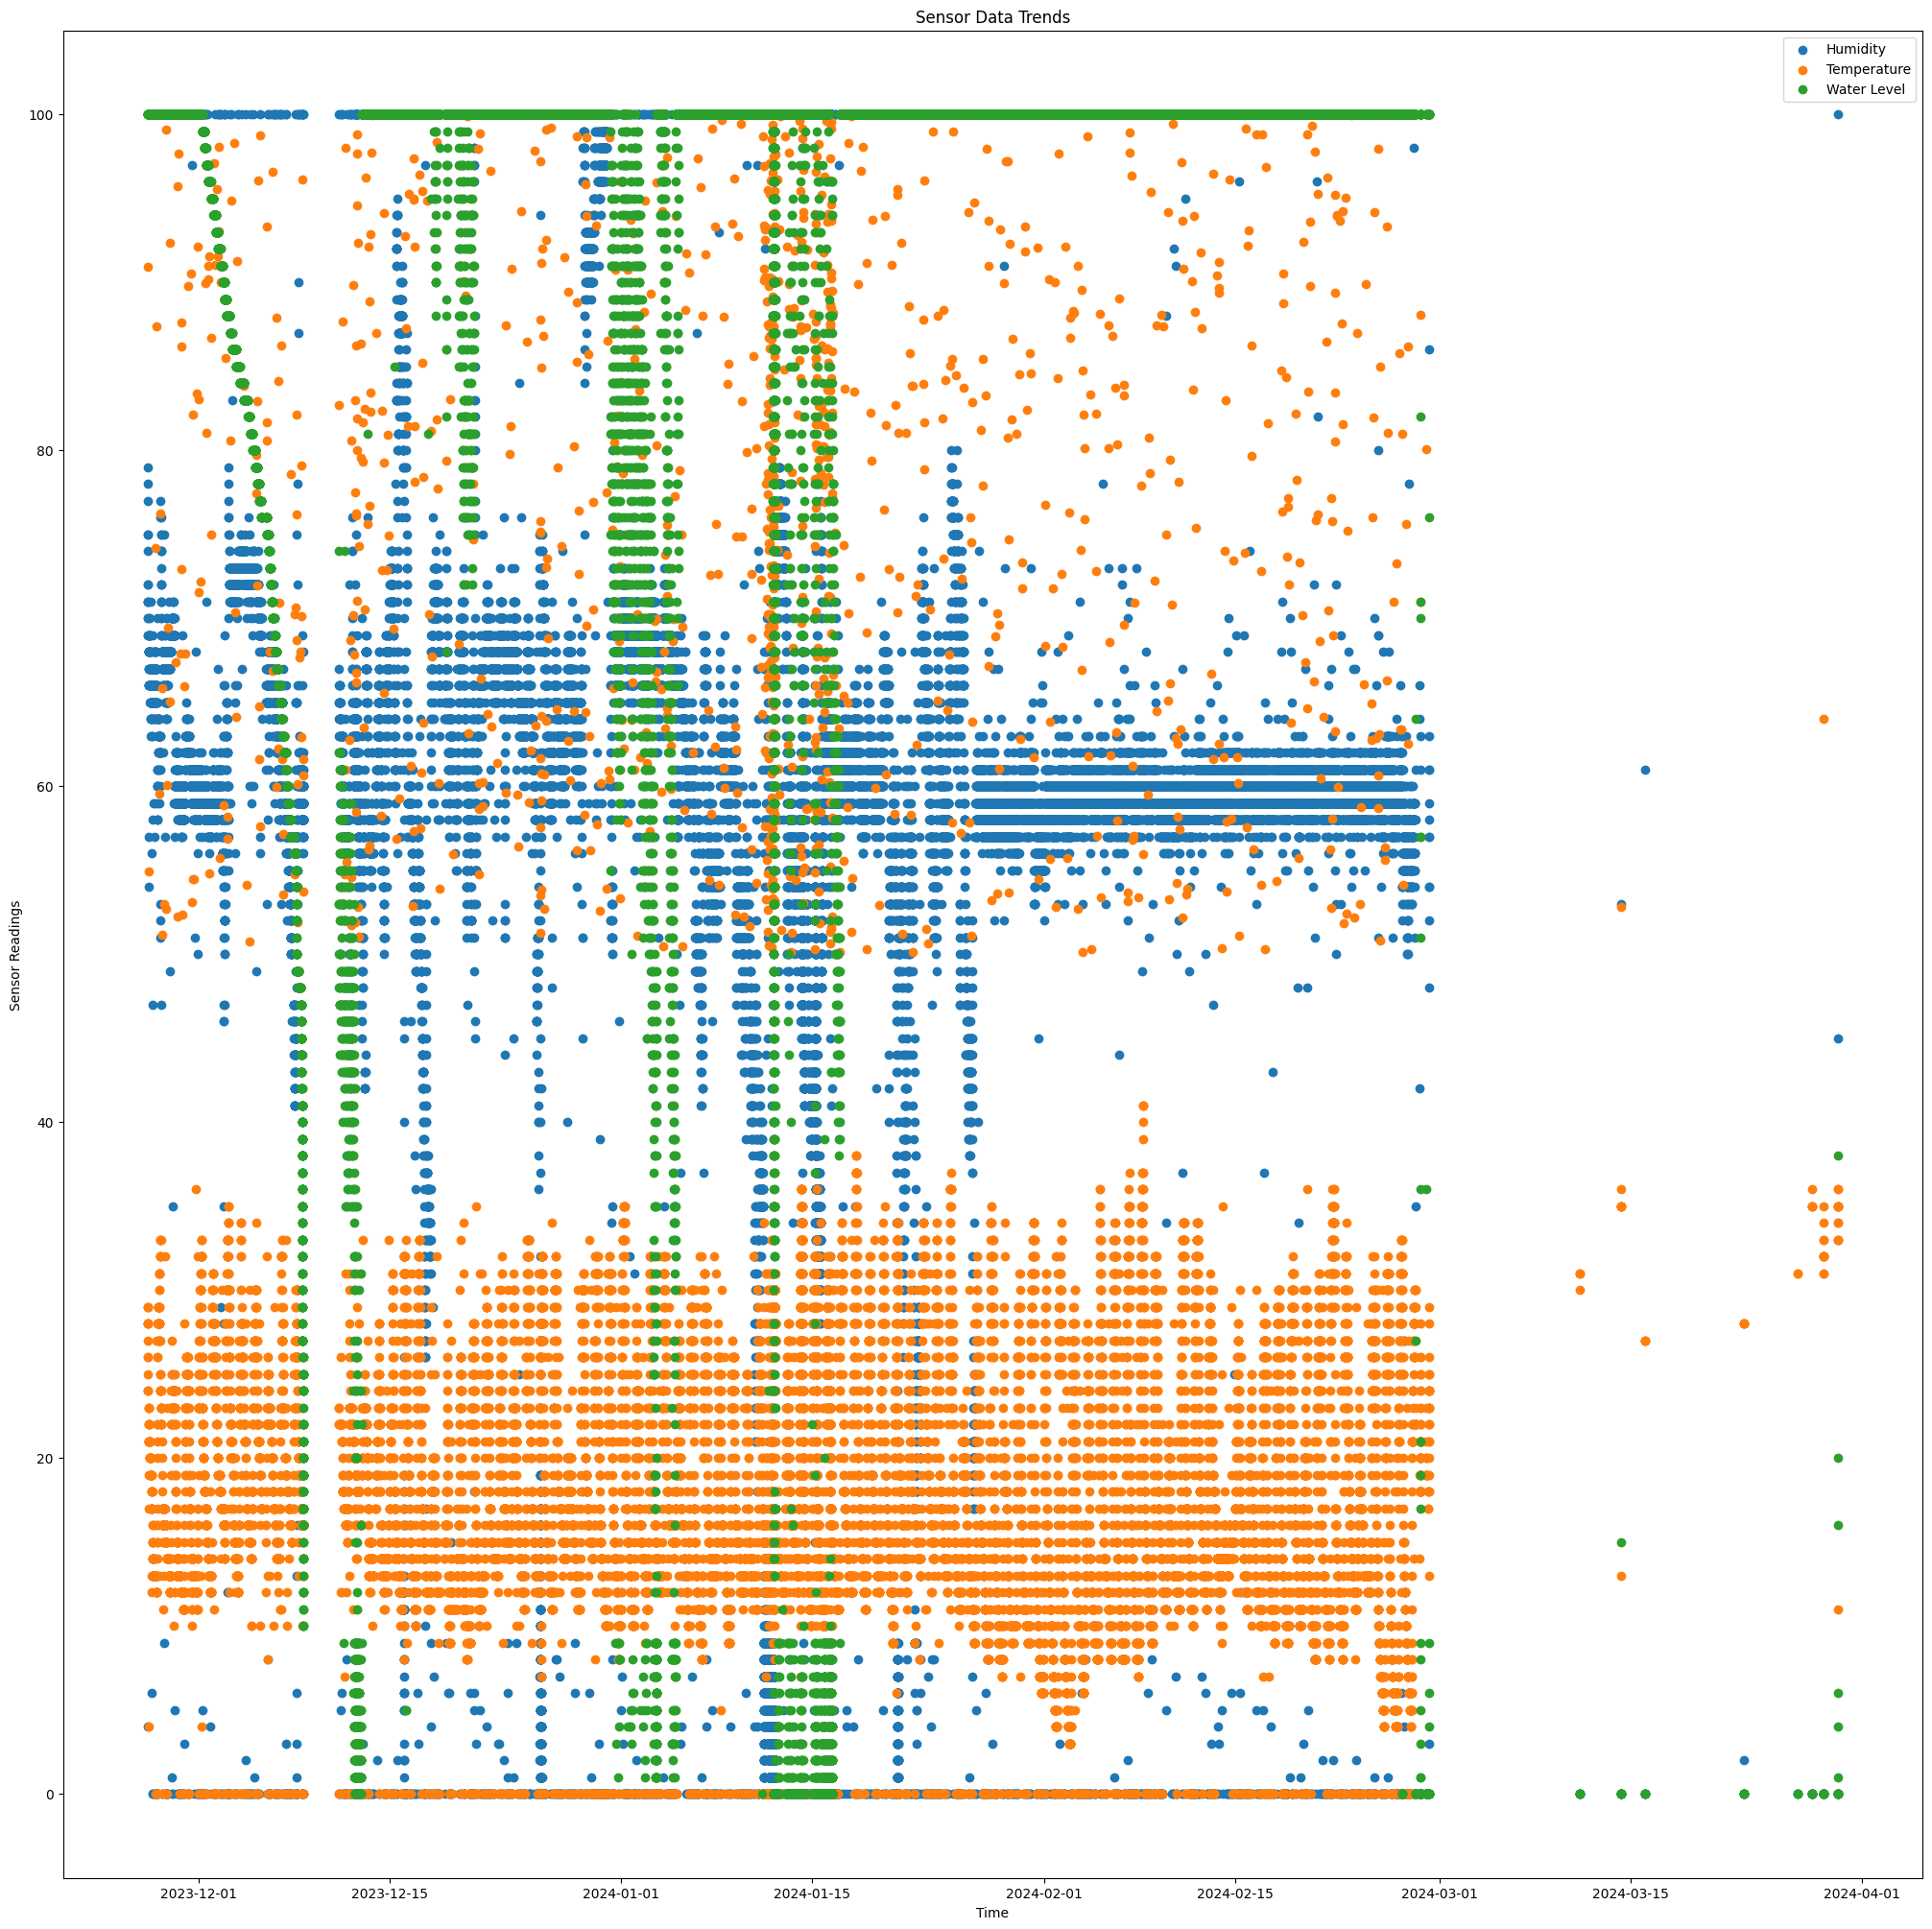

In [18]:
# plot variables
import matplotlib.pyplot as plt
import seaborn as sns

# Plot sensor data
# i wanted to plot so i could see the different patterns for each variable (is it linear? up down pattern?)
plt.figure(figsize=(25,25))
data['date'] = pd.to_datetime(data['date'], errors='coerce')
plt.scatter(data['date'], data['humidity'], label='Humidity')
plt.scatter(data['date'], data['tempreature'], label='Temperature')
plt.scatter(data['date'], data['water_level'], label='Water Level')
#plt.scatter(data['date'], data['N'], label='Nitrogen')
#plt.scatter(data['date'], data['P'], label='Phosphorus')
#plt.scatter(data['date'], data['K'], label='Potassium')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Sensor Readings')
plt.title('Sensor Data Trends')
plt.show()

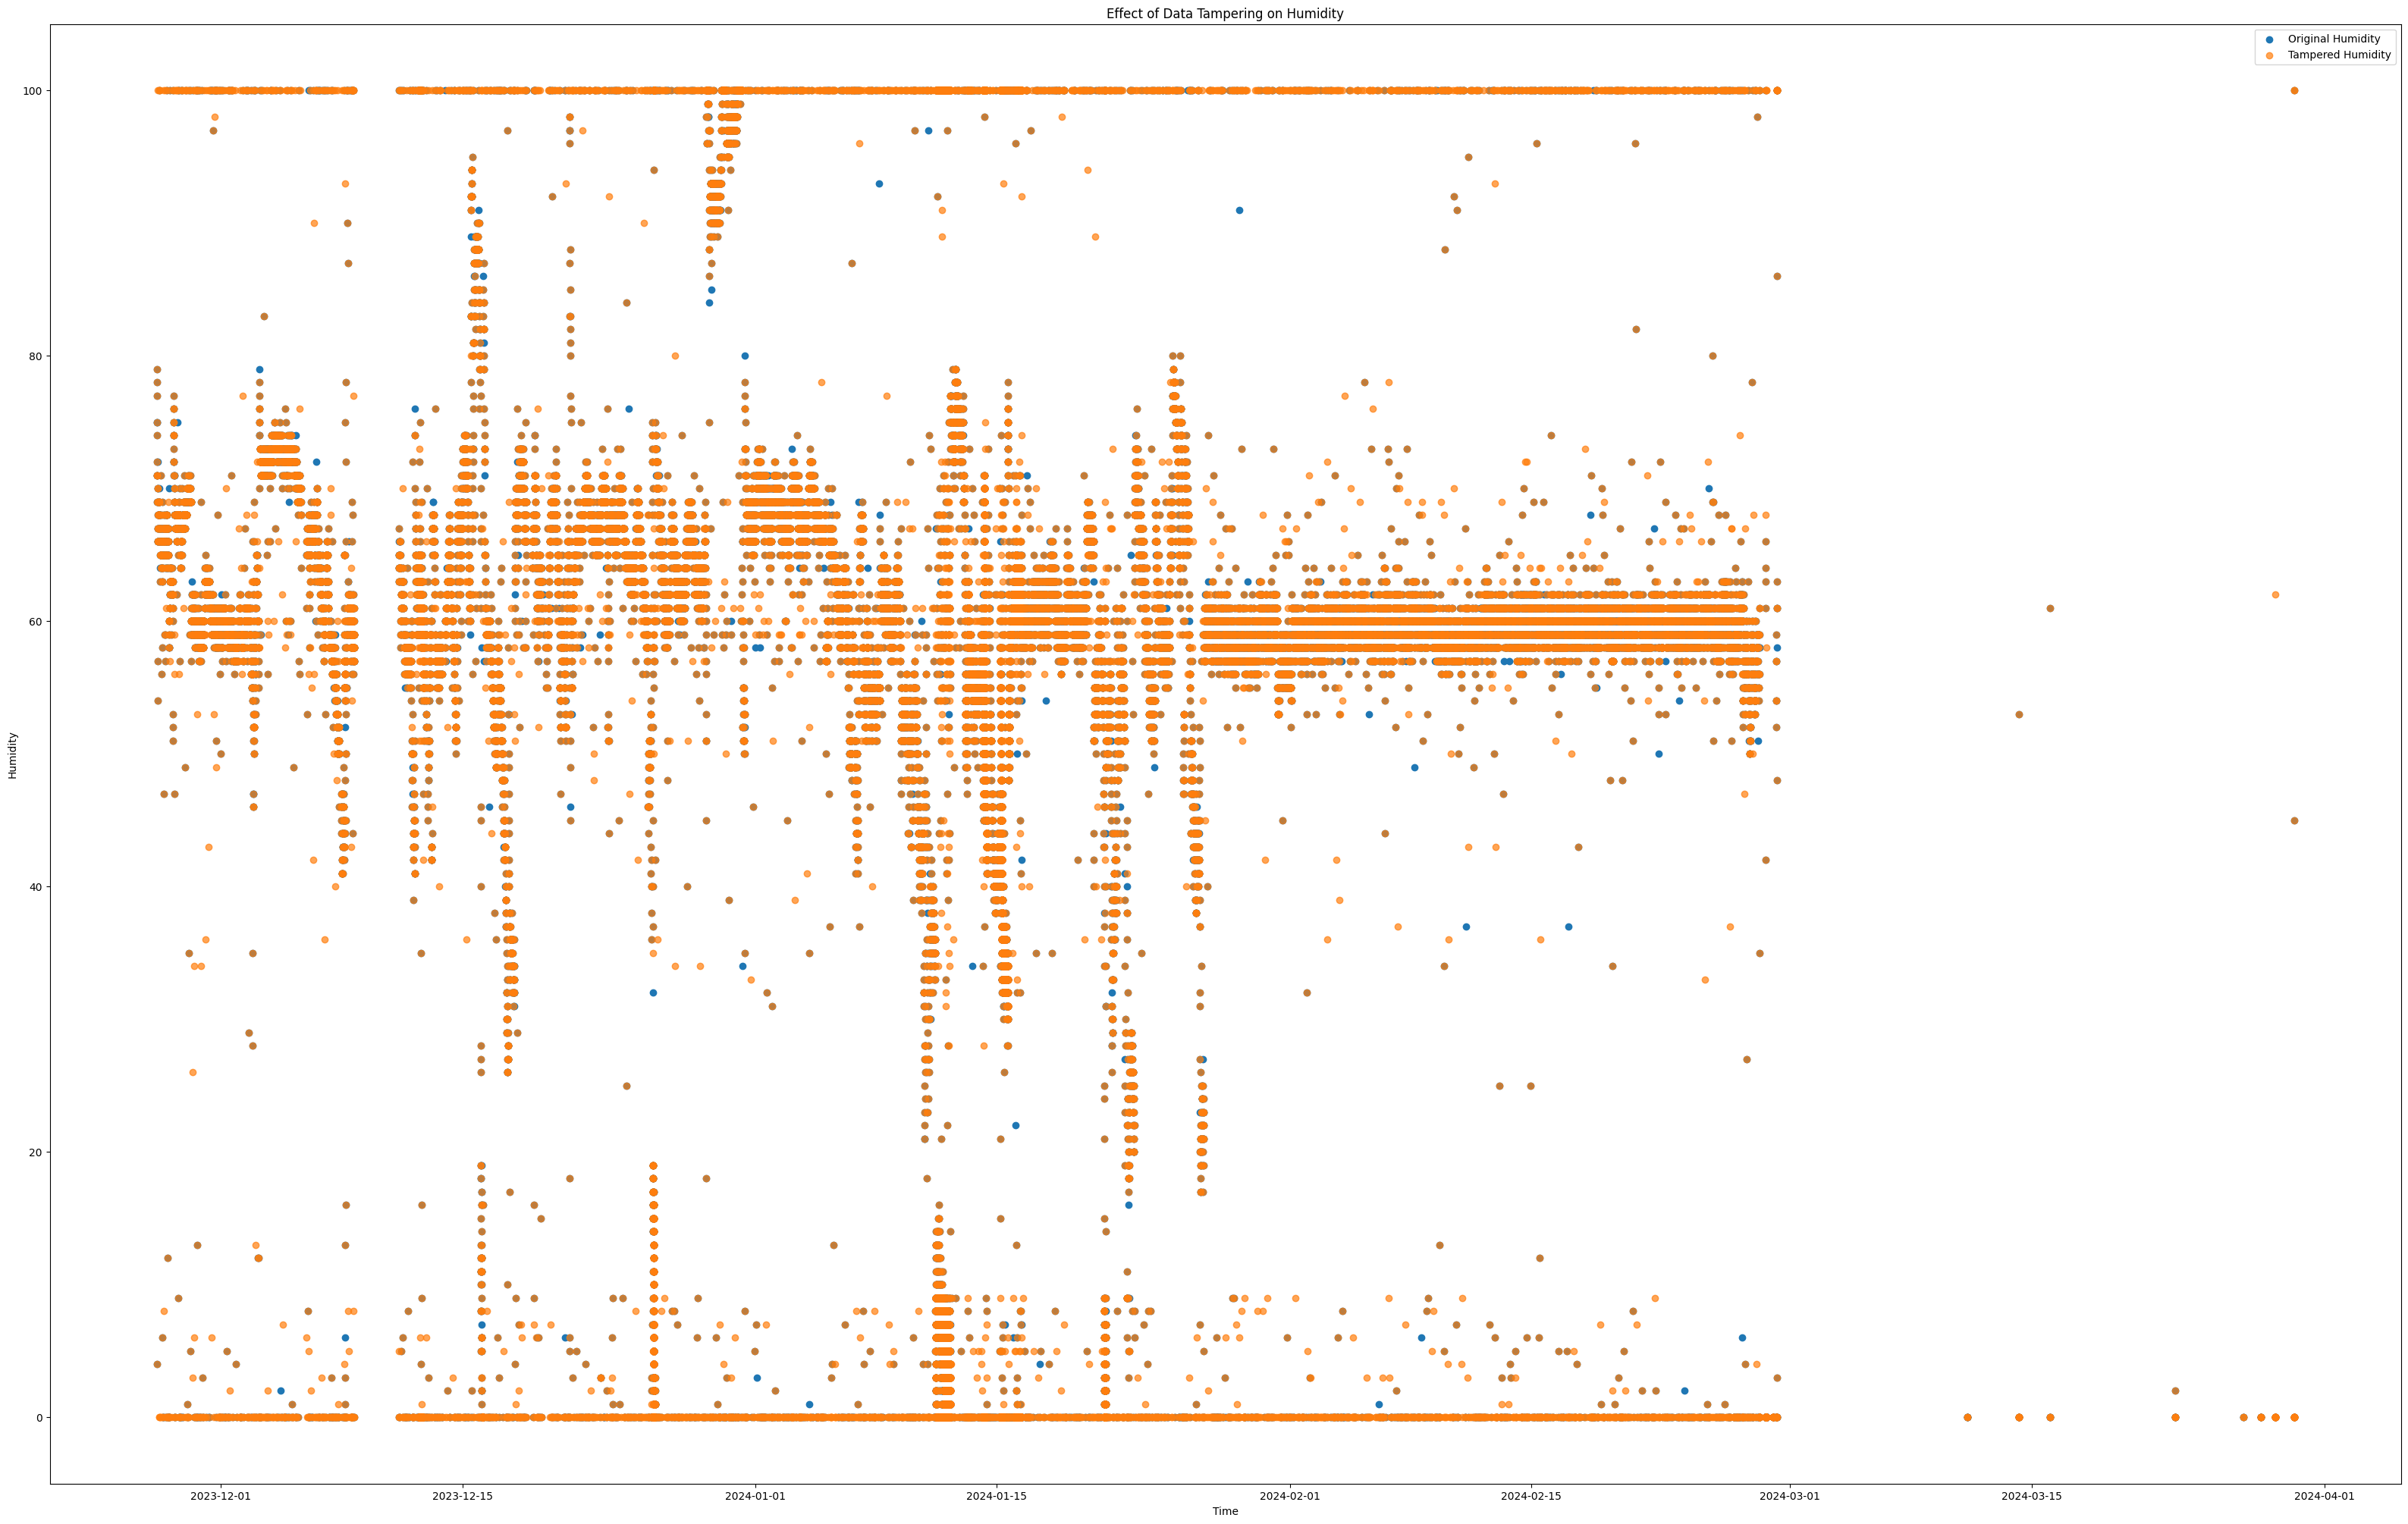

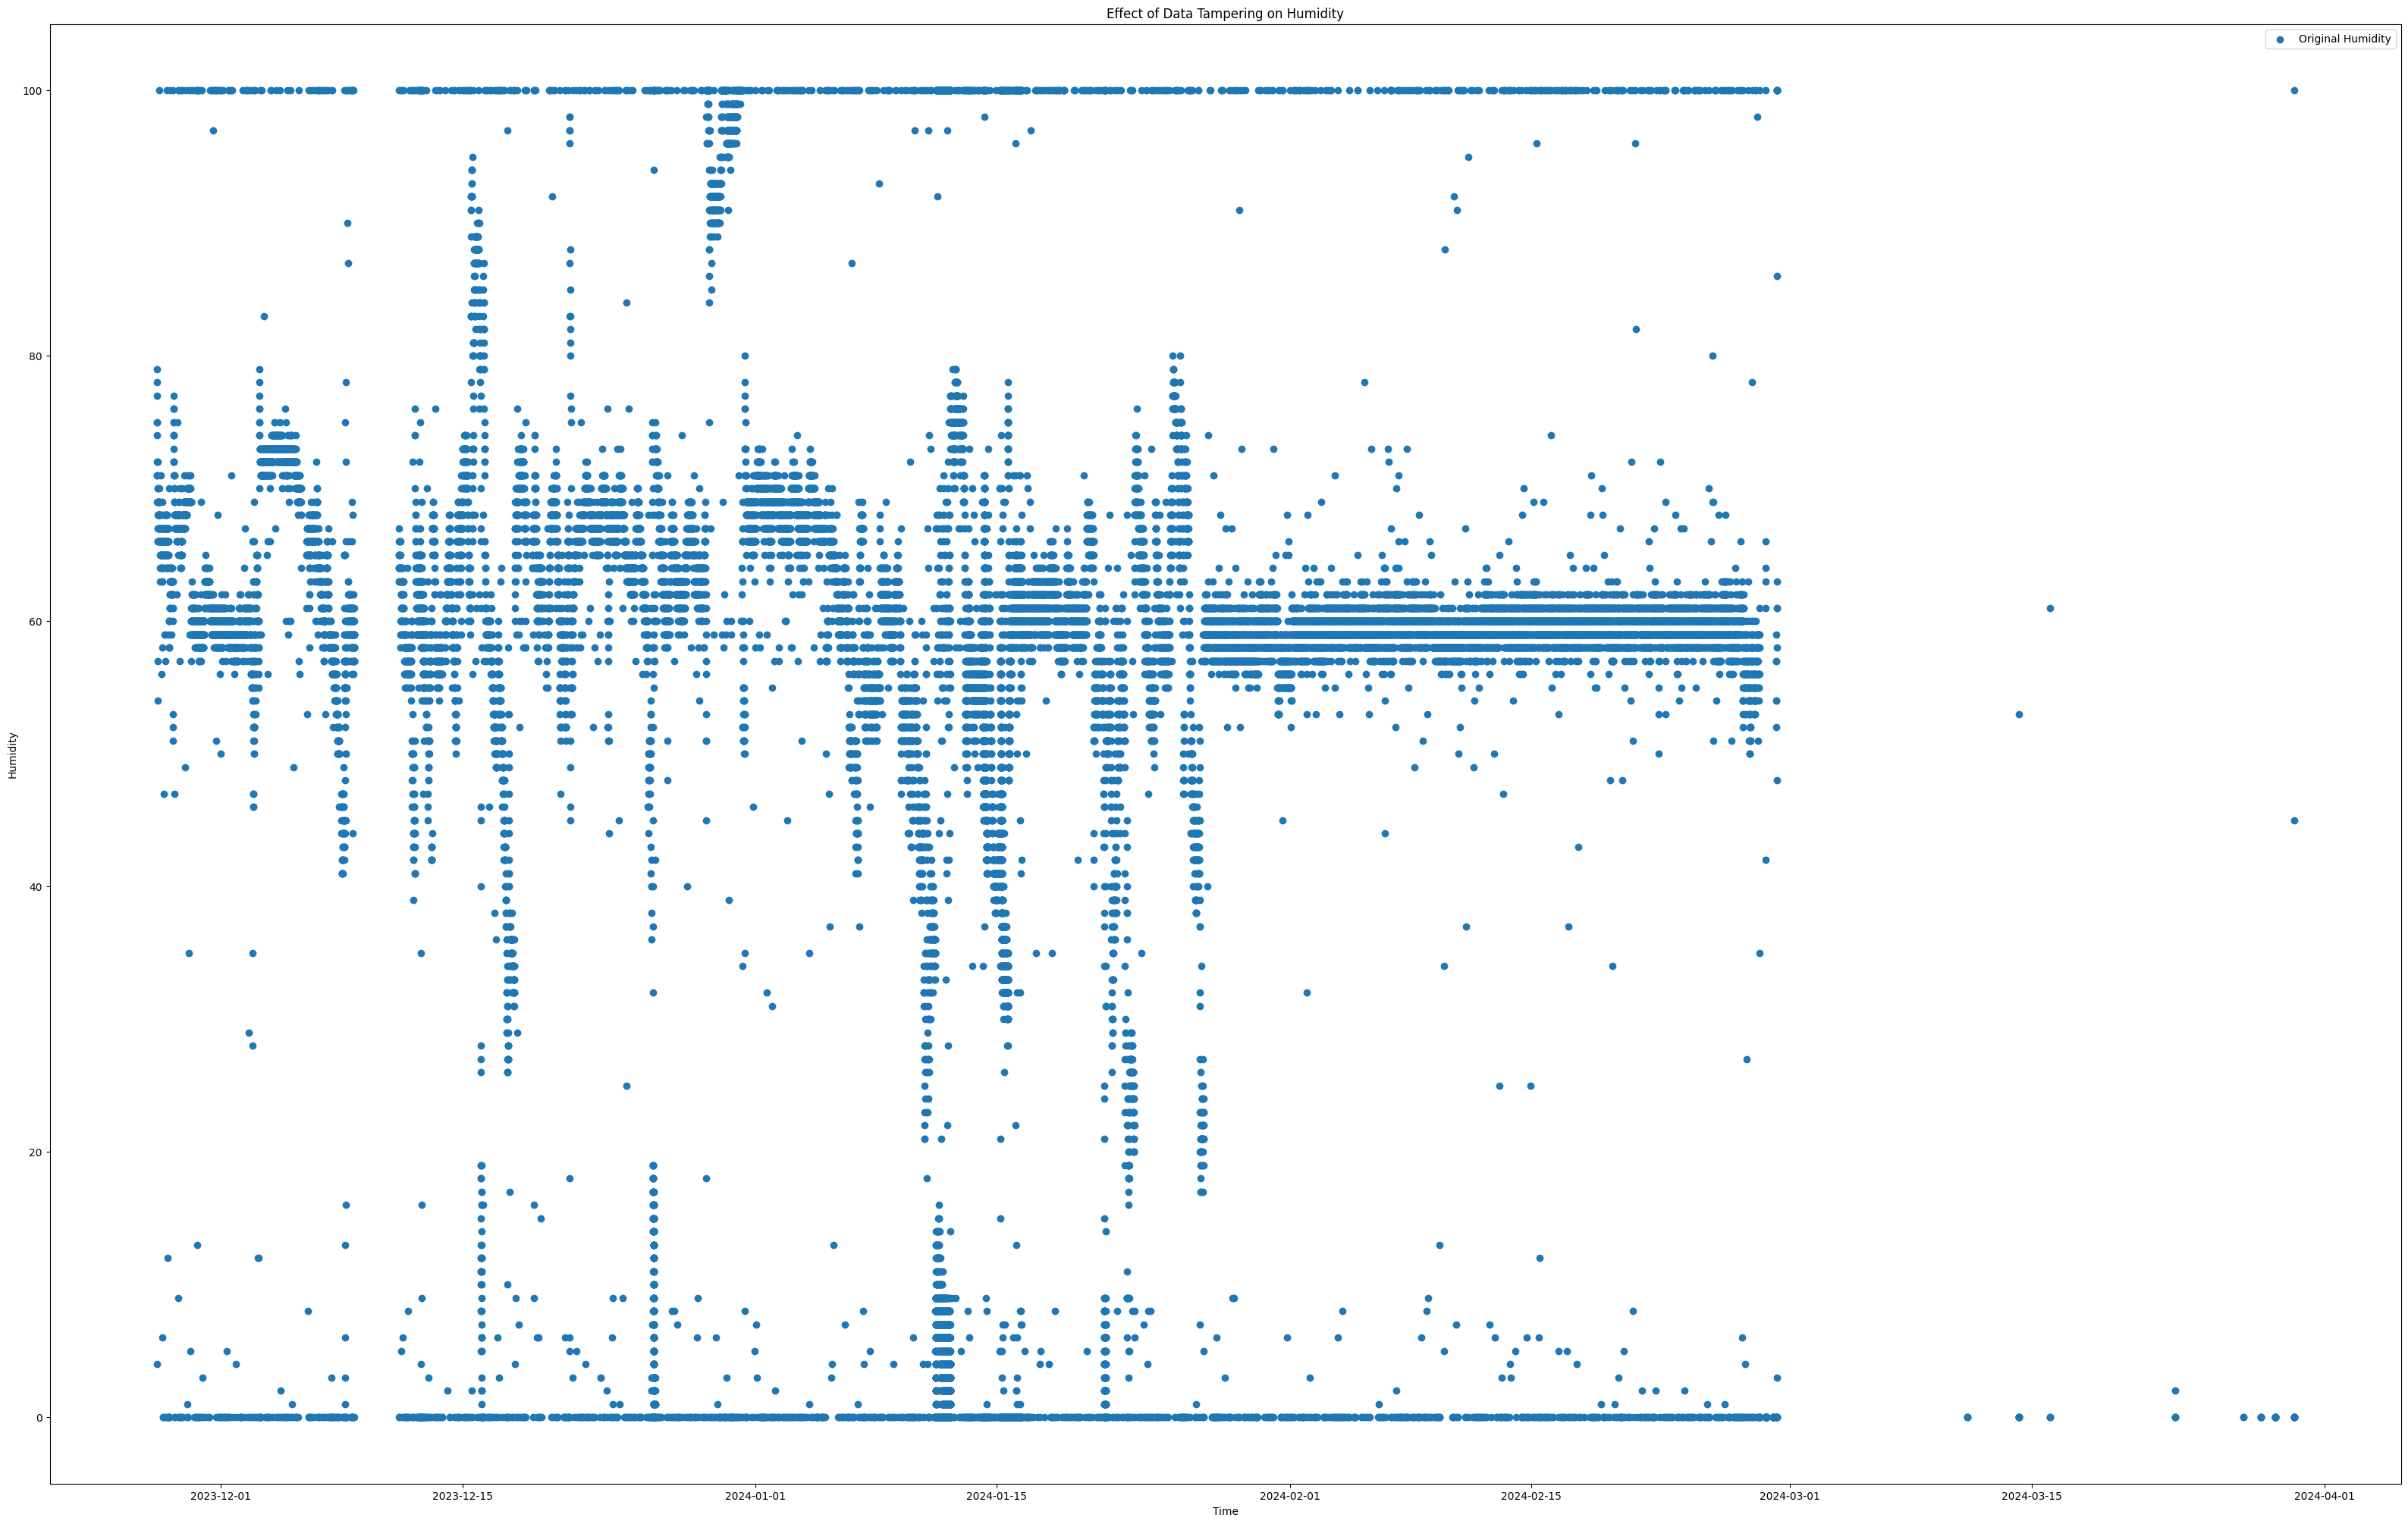

In [27]:
# simulate cyberattacks
import numpy as np
attacked_data = data.copy()
# data tampering
# random extreme values for humidity
tampering_indices_humid = np.random.choice(attacked_data.index, size=int(len(attacked_data) * 0.05), replace=False)
attacked_data.loc[tampering_indices_humid, 'humidity'] = np.random.choice([0, 100], size=len(tampering_indices_humid))

# unrealistic temperature values
tampering_indices_temp = np.random.choice(attacked_data.index, size=int(len(attacked_data) * 0.03), replace=False)
attacked_data.loc[tampering_indices_temp, 'tempreature'] = np.random.uniform(50, 100, size=len(tampering_indices_temp))


#DoS
# Simulate missing data by setting rows to not a number (NaN)
dos_indices = np.random.choice(attacked_data.index, size=int(len(attacked_data) * 0.02), replace=False)
attacked_data.loc[dos_indices, ['humidity', 'tempreature']] = np.nan


#spoof (mixy the values like a blender)
# Replace values with data from a different part of the dataset
spoofing_indices = np.random.choice(attacked_data.index, size=int(len(attacked_data) * 0.03), replace=False)
spoof_values = data.sample(n=len(spoofing_indices))
attacked_data.loc[spoofing_indices, ['humidity', 'tempreature']] = spoof_values[['humidity', 'tempreature']].values


#set labels
attacked_data['attack'] = 0  # not tampered regular rows
# Label tampered rows
attacked_data.loc[tampering_indices_humid, 'attack'] = 1
attacked_data.loc[tampering_indices_temp, 'attack'] = 1
attacked_data.loc[dos_indices, 'attack'] = 1
attacked_data.loc[spoofing_indices, 'attack'] = 1

#visualize 
# Compare normal and attacked data
plt.figure(figsize=(40, 25))
plt.scatter(data['date'], data['humidity'], label='Original Humidity')
plt.scatter(attacked_data['date'], attacked_data['humidity'], label='Tampered Humidity', alpha=0.7)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.title('Effect of Data Tampering on Humidity')
plt.show()
attacked_data.to_csv('attacked_dataset.csv', index=False)

plt.figure(figsize=(40, 25))
plt.scatter(data['date'], data['humidity'], label='Original Humidity')
#plt.scatter(attacked_data['date'], attacked_data['humidity'], label='Tampered Humidity', alpha=0.7)
plt.legend()
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.title('Effect of Data Tampering on Humidity')
plt.show()
attacked_data.to_csv('attacked_dataset.csv', index=False)

In [6]:
# Random forest model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data = pd.read_csv('attacked_dataset.csv')

# Handle missing values (if any remain)
data.fillna(0, inplace=True)

# Define features (sensor data) and target (attack label)
X = data[['tempreature', 'humidity']]  # Replace with relevant feature columns
y = data['attack']  # Target column

    
# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Get feature importances
importances = model.feature_importances_

# Display feature importance
for feature, importance in zip(X.columns, importances):
    print(f"{feature}: {importance:.4f}")

Confusion Matrix:
[[6565   77]
 [ 281  662]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6642
           1       0.90      0.70      0.79       943

    accuracy                           0.95      7585
   macro avg       0.93      0.85      0.88      7585
weighted avg       0.95      0.95      0.95      7585

tempreature: 0.4992
humidity: 0.5008
